In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

training_variants = pd.read_csv('../data/training_variants')

genes = set(training_variants['Gene'])
genes_freq = training_variants.Gene.value_counts()

classes = set(training_variants['Class'])
classes_freq = training_variants.Class.value_counts()

variations = set(training_variants['Variation'])
variations_freq = training_variants.Variation.value_counts()

In [2]:
# view classes and their frequency
print(classes_freq)

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64


In [3]:
# view genes and their frequency
print(genes_freq)

BRCA1      264
TP53       163
EGFR       141
PTEN       126
BRCA2      125
KIT         99
BRAF        93
ALK         69
ERBB2       69
PDGFRA      60
PIK3CA      56
CDKN2A      52
FGFR2       50
FLT3        49
TSC2        47
MTOR        45
KRAS        44
MAP2K1      43
VHL         41
RET         40
FGFR3       39
MLH1        35
MET         33
SMAD4       33
JAK2        33
NOTCH1      31
AKT1        28
ABL1        26
PTPN11      26
ROS1        26
          ... 
CDKN2C       1
TCF7L2       1
FGF4         1
IKBKE        1
NCOR1        1
GNAQ         1
FAM58A       1
AXIN1        1
RAD51D       1
RNF43        1
TCF3         1
SRSF2        1
RRAS2        1
IKZF1        1
ARID5B       1
SDHB         1
FUBP1        1
IL7R         1
CTLA4        1
GLI1         1
SHQ1         1
GNA11        1
WHSC1L1      1
HLA-B        1
RICTOR       1
CDK8         1
DUSP4        1
CCND2        1
MDM4         1
ARID1A       1
Name: Gene, Length: 264, dtype: int64


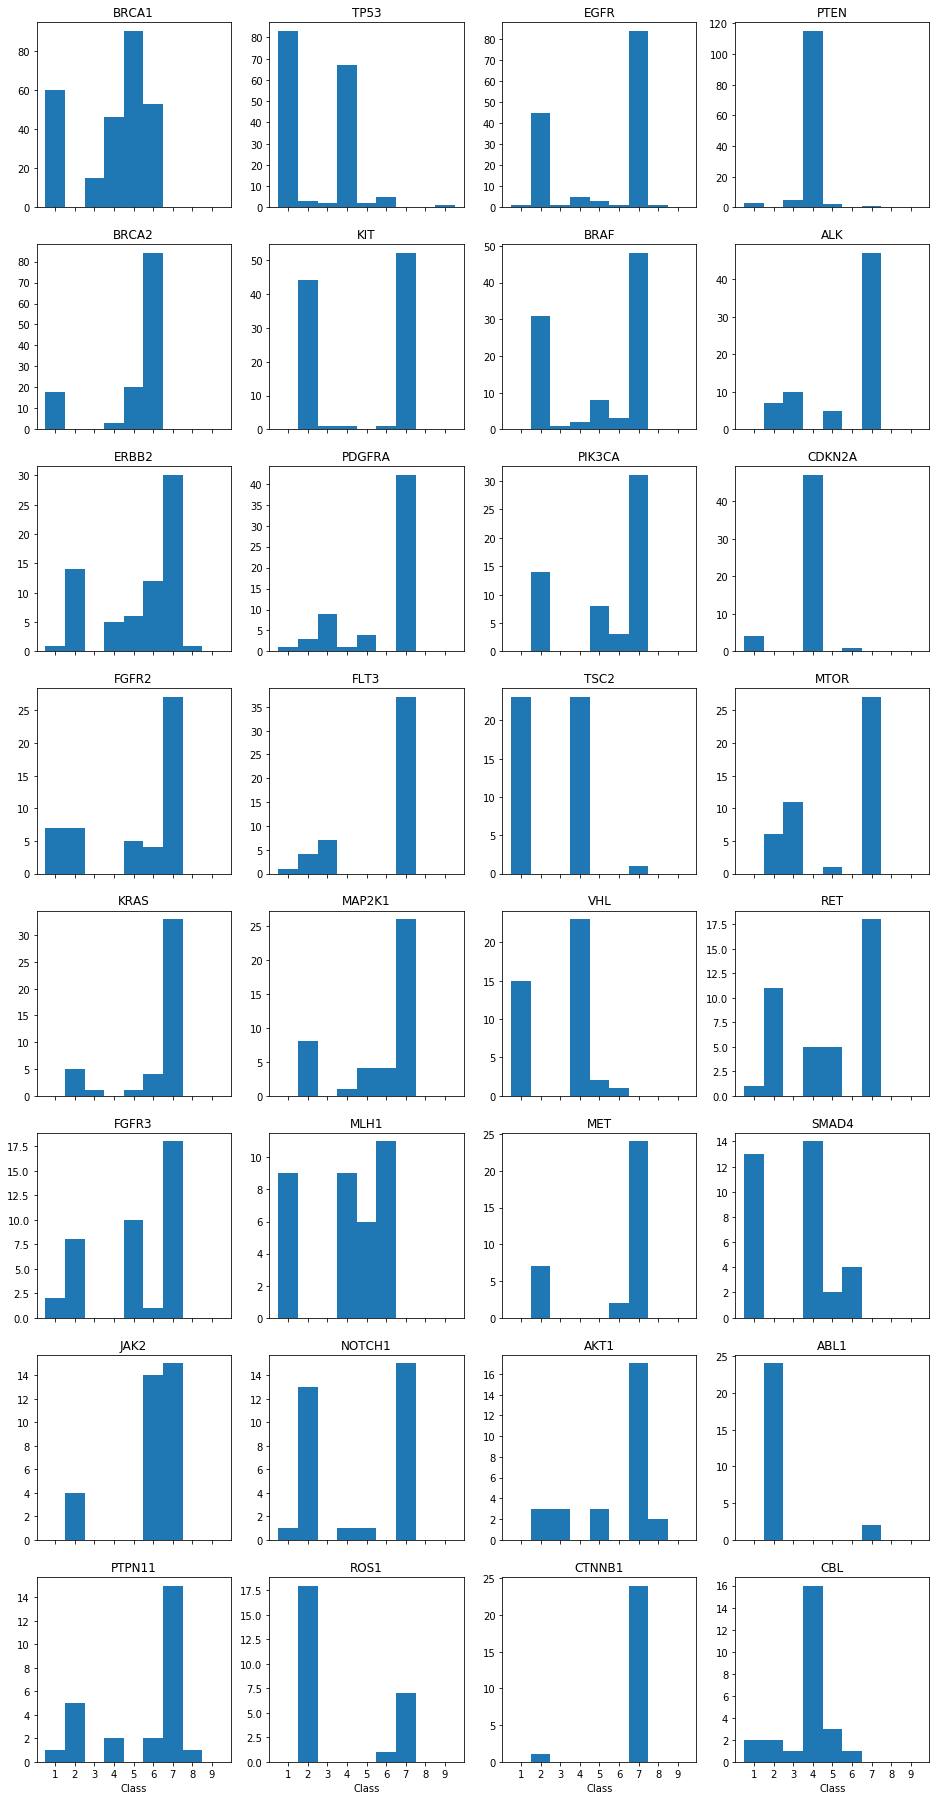

In [4]:
# view class distribution for the most common genes mutations
n,m = 8,4
plt.figure(figsize=(16,32))
for j, gene in enumerate(genes_freq.axes[0][:n*m]):
    subp = plt.subplot(n, m, j+1)
    plt.hist(training_variants[training_variants['Gene']==gene].Class, bins = np.arange(1,11), align='left')
    subp.set_xticks(np.arange(1,10))
    
    if j>=(n-1)*m:
        #subp.set_xticks(np.arange(1,10))
        subp.set_xlabel('Class')
    else:
        subp.set_xticklabels([])
    subp.set_title(gene)

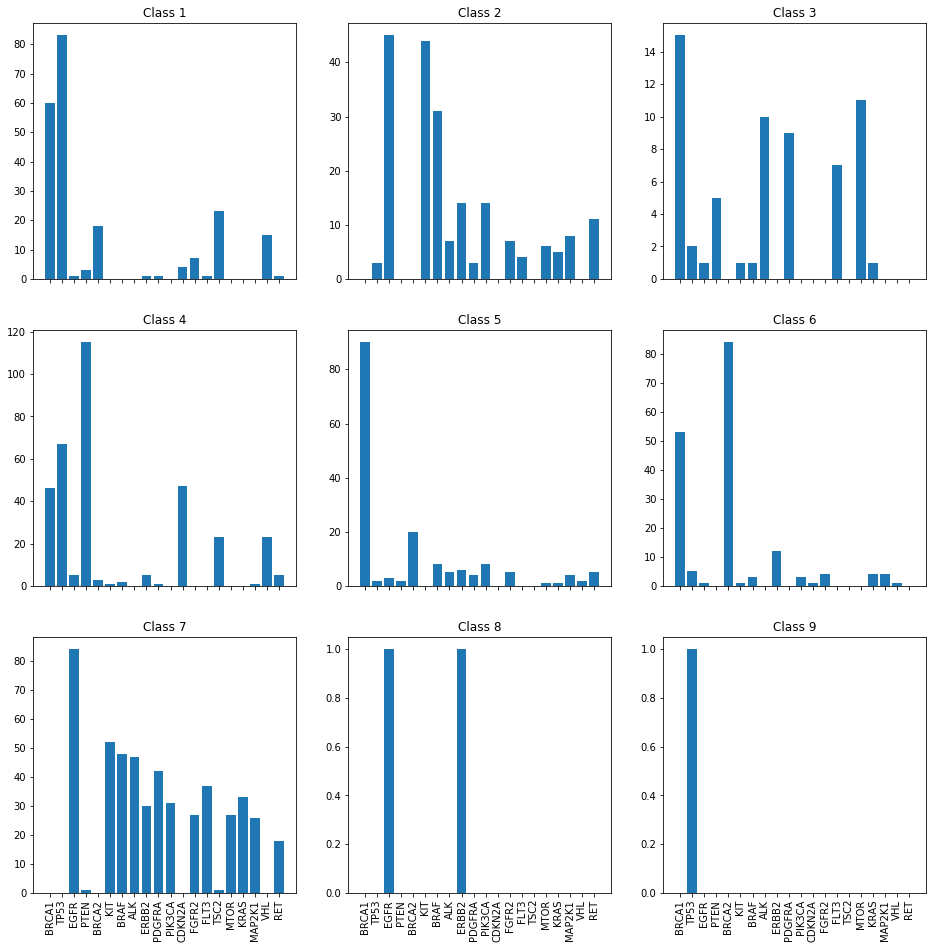

In [5]:
# view distribution of the most common gene mutations in classes
n,m = 3,3
ngenes = 20
plt.figure(figsize=(16,16))
for cclass in range(1,10):
    class_genes = training_variants[training_variants.Class == cclass].Gene.value_counts()

    class_gene_freq = {}
    for gene in genes_freq[0:ngenes].axes[0]:
        if gene in class_genes.axes[0]:
            class_gene_freq[gene] = class_genes[gene]
        else:
            class_gene_freq[gene] = 0
    subp = plt.subplot(n, m, cclass)
    plt.bar(np.arange(ngenes), class_gene_freq.values())
    subp.set_xticks(np.arange(ngenes))
    if cclass > 6:
        subp.set_xticklabels(list(class_gene_freq.keys()), rotation='vertical')
    else:
        subp.set_xticklabels([])
    subp.set_title('Class '+str(cclass))

In [6]:
# a lot of variations, most of them are unique
print(variations_freq)

Truncating Mutations         93
Deletion                     74
Amplification                71
Fusions                      34
Overexpression                6
G12V                          4
Q61H                          3
Q61R                          3
T58I                          3
E17K                          3
Q61L                          3
T286A                         2
K117N                         2
M1R                           2
R841K                         2
V321M                         2
G12A                          2
I31M                          2
T167A                         2
G13D                          2
ETV6-NTRK3 Fusion             2
R170W                         2
Promoter Hypermethylation     2
S308A                         2
Y42C                          2
G35R                          2
A146T                         2
E330K                         2
T73I                          2
E542K                         2
                             ..
N276S   

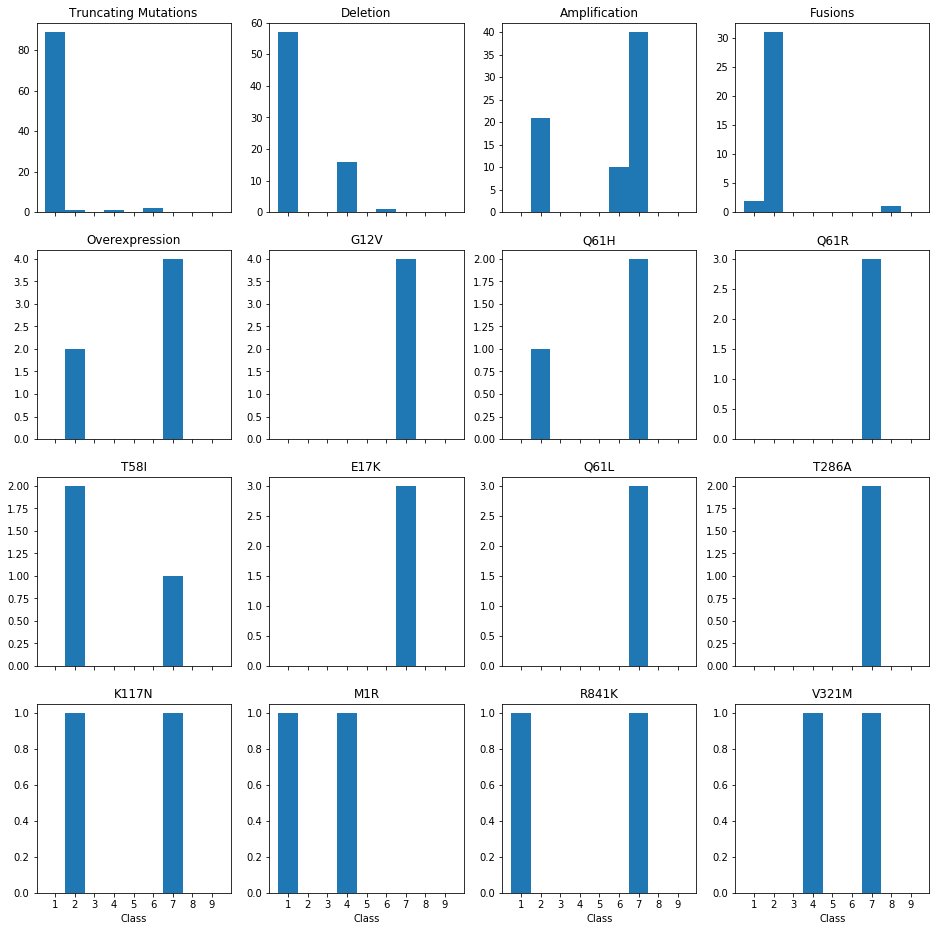

In [7]:
# view class distribution for the most common variations
n, m = 4, 4
plt.figure(figsize=(16,16))
for j, variation in enumerate(variations_freq.axes[0][:n*m]):
    subp = plt.subplot(n, m, j+1)
    plt.hist(training_variants[training_variants['Variation']==variation].Class, bins = np.arange(1,11), align='left')
    subp.set_xticks(np.arange(1,10))
    
    if j>=(n-1)*m:
        #subp.set_xticks(np.arange(1,10))
        subp.set_xlabel('Class')
    else:
        subp.set_xticklabels([])
    subp.set_title(variation)

In [8]:
# a bunch of variations are some names xxx Fusion; let's see their distribution
def isfusion(s):
    if s[-6:] == 'Fusion':
        return True
    return False
training_variants[training_variants.Variation.apply(lambda s: isfusion(s))].Class.value_counts()
# seems their distribution is quite different from the general 'Fusions' variation

7    93
2    47
8     4
4     3
9     1
Name: Class, dtype: int64

In [9]:
# a bunch of variations are some names xxx del; let's see their distribution

def isdel(s):
    if s[-3:] == 'del':
        return True
    return False
training_variants[training_variants.Variation.apply(lambda s: isdel(s))].Class.value_counts()
# seems their distribution is quite different from the general 'Deletion' variation


7    45
2    30
4    11
5     3
1     3
Name: Class, dtype: int64

In [10]:
# some variations are some names xxx dup; let's see their distribution

def isdup(s):
    if s[-3:] == 'dup':
        return True
    return False
print(training_variants[training_variants.Variation.apply(lambda s: isdup(s))].Class.value_counts())
# seems all of them are class 7
print(training_variants[training_variants.Variation.apply(lambda s: isdup(s))].Variation)

7    12
Name: Class, dtype: int64
141     D770_P772dup
144     N771_H773dup
214          H773dup
221     S768_D770dup
236     A767_V769dup
718     Y772_A775dup
768     G778_P780dup
1483    S267_D273dup
1540        T1151dup
2721         T599dup
2993    S501_A502dup
3022    A502_Y503dup
Name: Variation, dtype: object


In [11]:
def isx(s, pattern):
    #if s[-len(pattern):] == pattern:
    if pattern in s:
        return True
    return False

pattern = 'delins'

print(training_variants[training_variants.Variation.apply(lambda s: isx(s, pattern))].Class.value_counts())
# seems all of them are class 7
print(training_variants[training_variants.Variation.apply(lambda s: isx(s, pattern))])

7    21
2     8
4     2
Name: Class, dtype: int64
        ID    Gene              Variation  Class
138    138    EGFR       L747_T751delinsP      7
171    171    EGFR       A859_L883delinsV      2
184    184    EGFR       A750_E758delinsP      7
187    187    EGFR       L747_P753delinsS      7
195    195    EGFR       L747_A750delinsP      7
218    218    EGFR       E746_T751delinsA      7
225    225    EGFR       E709_T710delinsD      7
229    229    EGFR  I744_K745delinsKIPVAI      7
231    231    EGFR       E746_A750delinsQ      7
240    240    EGFR      E746_T751delinsVA      7
262    262    EGFR       E746_S752delinsA      7
276    276    EGFR       E746_S752delinsI      7
725    725   ERBB2           G776delinsVC      7
758    758   ERBB2           G776delinsLC      7
900    900  PDGFRA       S566_E571delinsR      7
921    921  PDGFRA       H845_N848delinsP      7
998    998    TSC1       N198_F199delinsI      4
1262  1262  PIK3R1       K459_S460delinsN      4
1487  1487   FGFR2 

In [12]:
# some variations are have funny names; let's see their distribution
def isx(s, pattern):
    if s[-len(pattern):] == pattern:
        return True
    return False

pattern = 'insertions'
print(training_variants[training_variants.Variation.apply(lambda s: isx(s, pattern))])

pattern = 'deletions'
print(training_variants[training_variants.Variation.apply(lambda s: isx(s, pattern))])

pattern = 'mutations'
print(training_variants[training_variants.Variation.apply(lambda s: isx(s, pattern))])

# Well seems one can play with variations quite a lot; for the moment I will leave them
# as they are, and eventually later can use some protein chain info to use the variation
# info more efficiently

      ID   Gene                      Variation  Class
428  428   TP53  DNA binding domain insertions      4
743  743  ERBB2             Exon 20 insertions      7
      ID   Gene                     Variation  Class
412  412   TP53  DNA binding domain deletions      4
732  732  ERBB2  Exon 20 insertions/deletions      7
        ID   Gene                              Variation  Class
480    480   TP53  DNA binding domain missense mutations      4
3008  3008    KIT                      Exon 11 mutations      7
3025  3025    KIT                       Exon 9 mutations      7
3060  3060  MED12                       Exon 1 mutations      7
3062  3062  MED12                       Exon 2 mutations      2


In [13]:
# Enough digging into variables names; seems the test dataset contains A LOT more genes/variations. So the info
# in these is a bit limited; let's dive into the texts! 